In [ ]:
! pip install opencv-python opencv-contrib-python matplotlib numpy

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)  # Change path to your image
if image is None:
    raise FileNotFoundError("The image file could not be loaded.")

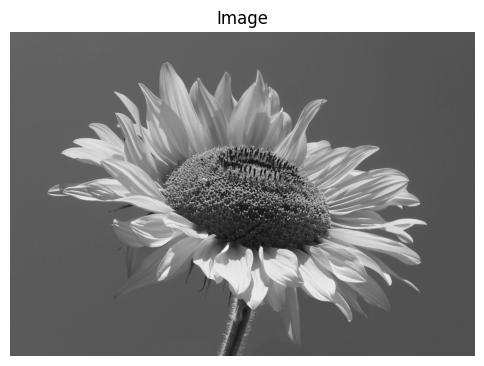

In [3]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(image)

# ---- Exercise 1: Geometrical Transformations ----

In [8]:
# 1. Scaling: Resize the image
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)

In [9]:
# 2. Rotation: Rotate the image by 45 degrees
(height, width) = image.shape
center = (width // 2, height // 2)  # Rotate around center
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)  # Angle = 45 degrees, scale = 1
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

In [10]:
# 3. Shearing: Apply affine transformation for shearing
shearing_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])  # Shear in x and y directions
sheared_image = cv2.warpAffine(image, shearing_matrix, (width, height))

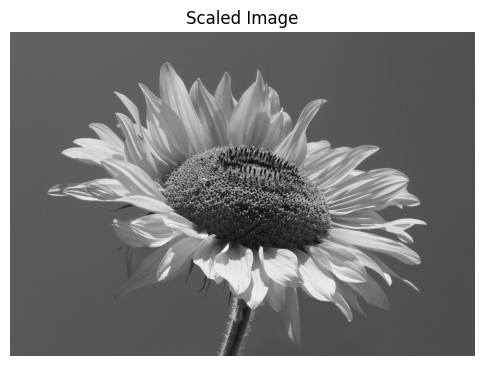

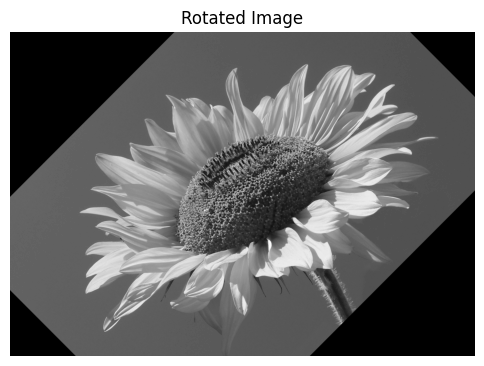

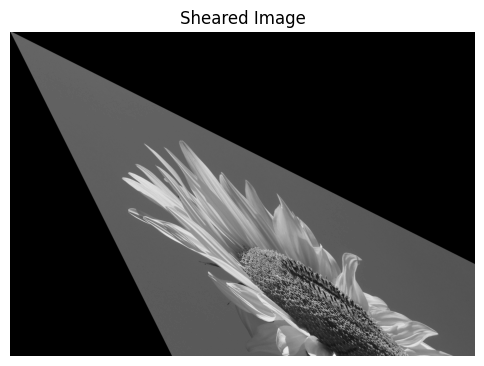

In [11]:
# Display the results of transformations
display_image(scaled_image, "Scaled Image")
display_image(rotated_image, "Rotated Image")
display_image(sheared_image, "Sheared Image")

# ---- Exercise 2: Implement SIFT ----

In [12]:
# 1. Load image and create SIFT detector
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

In [13]:
# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

In [14]:
# Keypoints are localized by the SIFT algorithm
print(f"Number of Keypoints: {len(keypoints)}")

Number of Keypoints: 10572


In [15]:
# The descriptors are already computed using 'detectAndCompute' method
print(f"Shape of descriptors: {descriptors.shape}")

Shape of descriptors: (10572, 128)


In [17]:
# Draw keypoints on the image to visualize them
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

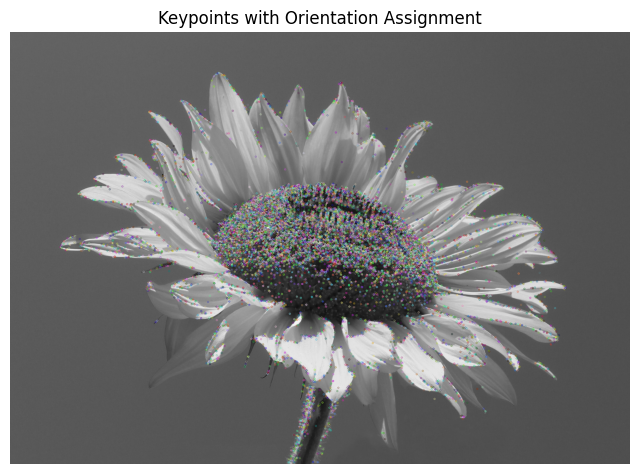

In [18]:
# Display the image with keypoints
plt.figure(figsize=(8, 8))
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('Keypoints with Orientation Assignment')
plt.axis('off')
plt.show()

In [19]:
# Print keypoint positions and orientations
for i, kp in enumerate(keypoints[:5]):  # Display first 5 keypoints
    print(f"Keypoint {i+1} - Position: {kp.pt}, Size: {kp.size}, Angle: {kp.angle}")

Keypoint 1 - Position: (197.64532470703125, 846.5507202148438), Size: 2.553145170211792, Angle: 131.8883514404297
Keypoint 2 - Position: (197.64532470703125, 846.5507202148438), Size: 2.553145170211792, Angle: 321.1961669921875
Keypoint 3 - Position: (201.1722869873047, 839.3189697265625), Size: 3.203148365020752, Angle: 12.918212890625
Keypoint 4 - Position: (202.0186767578125, 850.0009155273438), Size: 2.629864454269409, Angle: 109.46917724609375
Keypoint 5 - Position: (202.0186767578125, 850.0009155273438), Size: 2.629864454269409, Angle: 300.6902770996094


In [20]:
# First keypoint's descriptor (a vector of 128 elements)
print(f"First keypoint's descriptor: {descriptors[0]}")

First keypoint's descriptor: [ 52.  82.   0.   0.   2.  25.   1.   0. 147. 147.   1.   2.  63.  20.
   0.   0.  12.  11.   0.   2. 147.  78.   0.   0.   0.   0.   0.   1.
  24.   7.   0.   0.  35.  12.   0.   0.  20. 147.   6.   8. 147.  76.
   9.  14.  39.  12.   3.  28.  42.  12.   8.  69. 147.  20.   0.   1.
   2.   2.   0.   8.  48.   3.   0.   0.   9.   4.  23.  87.  68.  84.
   2.   4.  89.  95. 108.  54.  16.   9.   2.  11.   8.  14.  71. 147.
  72.   0.   1.   1.   6.   1.   0.  12.  12.   0.   0.   1.   0.   0.
  36.  68.   2.   0.   2.   1.   0.   5.  27.  12.   1.   0.   4.   1.
   0.   0.  12.  11.   0.   1.   6.   1.   2.   1.   0.   1.   0.   0.
   1.   1.]
